In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import seaborn as sns 
sns.set() 

In [2]:
data = pd.read_csv('energy-use-and-greenhouse-gas-emissions-related-to-federal-facilities-and-fleets-en.csv')

In [3]:
data

,Federal organization,Fiscal year,GHG source,GHG scope,Energy category,Energy use (GJ),Emissions (t)
0,Agriculture and Agri-Food Canada,FY 2005-06,facilities,2,electricity,524494.106500,54100.253730
1,Agriculture and Agri-Food Canada,FY 2005-06,facilities,1,natural gas,446241.301700,22229.480080
2,Agriculture and Agri-Food Canada,FY 2005-06,facilities,2,district energy,154568.000000,11203.651960
3,Agriculture and Agri-Food Canada,FY 2005-06,fleets,1,gasoline,73844.057790,4540.532151
4,Agriculture and Agri-Food Canada,FY 2005-06,facilities,1,"fuel oil (1, 2, 4, 5, 6, diesel, kerosene)",59955.495690,4271.967786
...,...,...,...,...,...,...,...
938,Transport Canada,FY 2017-18,fleets,1,gasoline,20377.662310,1349.490933
939,Transport Canada,FY 2017-18,facilities,1,natural gas,18150.421950,903.917757
940,Transport Canada,FY 2017-18,facilities,2,electricity,89083.257910,802.175774
941,Transport Canada,FY 2017-18,facilities,1,liquified petroleum gas,2928.253105,178.667635


In [4]:
data.describe()

,GHG scope,Energy use (GJ),Emissions (t)
count,943.000000,9.430000e+02,943.000000
mean,1.148462,2.082870e+05,11325.124837
std,0.355746,7.457470e+05,39657.470391
min,1.000000,1.067800e-03,0.000061
25%,1.000000,1.786806e+03,108.758970
50%,1.000000,1.458122e+04,854.342747
75%,1.000000,8.099494e+04,4706.342723
max,2.000000,6.453502e+06,326863.810500


In [5]:
y = data['Emissions (t)']
x1 = data['Energy use (GJ)']

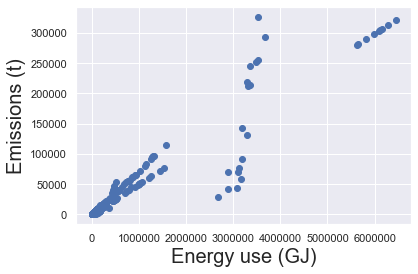

In [6]:
plt.scatter(x1,y)
plt.xlabel('Energy use (GJ)',fontsize=20)
plt.ylabel('Emissions (t)',fontsize=20)
plt.show()

In [7]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

D:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Emissions (t)   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     8764.
Date:                Mon, 13 Jan 2020   Prob (F-statistic):               0.00
Time:                        16:42:56   Log-Likelihood:                -10222.
No. Observations:                 943   AIC:                         2.045e+04
Df Residuals:                     941   BIC:                         2.046e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             799.5015    417.768      1.914      0.056     -20.363    1619.366
Energy use (GJ)     0.0505      0.001     93.614      0.000       0.049       0.052
==============================================================================
Omnibus:                      379.600   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           151457.548
Skew:                          -0.394   Prob(JB):                         0.00
Kurtosis:                      65.081   Cond. No.                     8.04e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.04e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

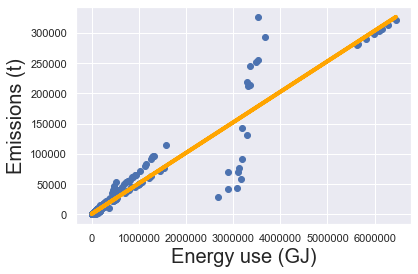

In [8]:
plt.scatter(x1,y)
yhat = 0.0505*x1 + 799.5015
fig = plt.plot(x1,yhat, lw=4, c='orange',label='regression line')
plt.xlabel('Energy use (GJ)',fontsize=20)
plt.ylabel('Emissions (t)',fontsize=20)
plt.show() 